In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib

In [3]:
import random

In [4]:
%matplotlib inline

In [5]:
matplotlib.rcParams["font.size"] = 16

# Stock Market Example

In [6]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### How do we compute *total gain* for *every year*?

In [7]:
df["total"] = df["return"].cumprod()
df.tail()

,year,return,total
44,2014,1.1369,88.439335
45,2015,1.0138,89.659797
46,2016,1.1196,100.383109
47,2017,1.2183,122.296742
48,2018,0.9557,116.878996


### Assuming you initally invested *1000 dollars in 1970*, what is your *total wealth* in every future year?

In [8]:
starting = 1000
df["wealth"] = df["total"] * starting
df.tail()

,year,return,total,wealth
44,2014,1.1369,88.439335,88439.334579
45,2015,1.0138,89.659797,89659.797397
46,2016,1.1196,100.383109,100383.109165
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230


### How do we create a *line plot* to plot *wealth gain* over the years?

Text(0, 0.5, 'Total wealth ($)')

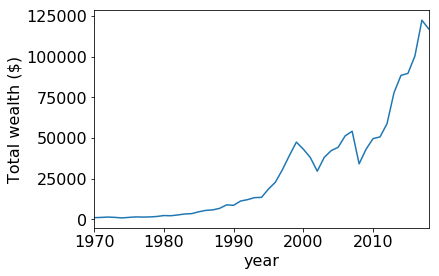

In [9]:
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Total wealth ($)")

### Random simulation

In [10]:
random.choice([3, 5, 9]) # sampling with replacement

3

In [11]:
random.choices([3, 5, 9], k = 10)

[9, 5, 5, 3, 9, 3, 5, 9, 3, 9]

### How risky is it in investing in SP500 index going forward?
### Approach:
1. Run simulation, randomly replaying past years.
2. Run hundreds of simulations, explore range of outcomes.

In [12]:
# Step 1
def run_sim(years = 10, starting = 1000):
    rand_returns = random.choices(df["return"], k = years)
    rand_returns = Series(rand_returns)
    rand_returns = rand_returns.cumprod() * starting
    return rand_returns

# Step 2
def run_n_sims(n, years = 10, starting = 1000):
    sims = pd.DataFrame()
    for i in range(n):
        sims["sim" + str(i)] = run_sim(years = 10, starting = 1000) 
    return sims

### For *10 years*, run *250 simulations*

In [13]:
sims = run_n_sims(250)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
5,2891.021072,3002.595426,1792.533391,2186.369829,1923.417413,1695.044087,1735.003148,1803.450314,1590.555498,1664.917159,...,3179.337354,1385.007299,2535.813823,3452.583109,2449.423890,4177.500851,986.417713,1423.759551,2122.884452,1716.591700
6,3827.422798,3122.999503,2459.355813,2764.883286,1211.752970,1801.323351,2380.424319,2197.143518,1401.438449,1613.304727,...,3559.586102,1900.230014,2694.809350,4245.296191,2901.097655,5530.593377,1034.850822,1730.579735,2569.539341,1593.340416
7,4351.396979,2838.806548,2796.041623,3793.419869,1476.278643,2047.924518,2097.391867,2911.215161,1553.914953,1844.168634,...,3401.896438,1993.531308,3570.622388,5160.157520,3216.737080,6363.500740,1099.735969,1653.915052,3525.407976,1448.346438
8,3955.419854,3124.958248,2055.929406,3845.769063,1553.783272,2356.341951,2885.591731,3523.734831,2058.937312,1436.607366,...,4479.957419,2600.960297,4658.591030,6640.090697,4196.876869,7321.843951,1508.837750,2128.257889,3666.776836,1646.625065
9,4579.980649,3618.389155,2435.042788,5064.493279,1325.998645,2593.861219,3001.303960,4192.539701,2649.440533,1738.869555,...,4967.376786,2219.659518,4720.084432,5666.653400,2644.032427,8324.204388,1724.752431,2033.976065,3846.815579,1681.368854


## How do you become a successful Data Scientist?
- By learning how to play both the detective and the lawyer

### How do we create a *line plot* to visualize all of the simulations?
- Be the detective

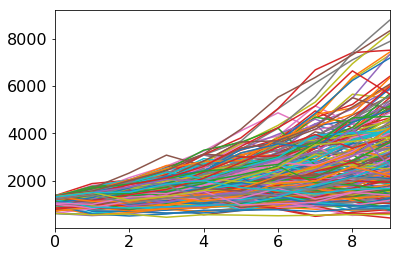

In [14]:
sims.plot.line(legend = False)

### How do we create a *line plot* to present *statistics* of all of the simulations?
- Be the lawyer

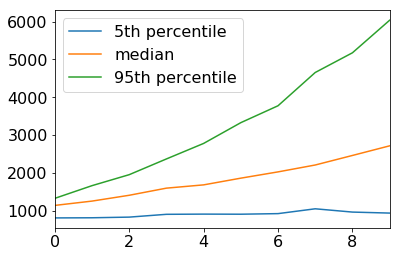

In [15]:
# .quantile
DataFrame({
    "5th percentile": sims.quantile(0.05, axis = 1),
    "median": sims.quantile(0.5, axis = 1),
    "95th percentile": sims.quantile(0.95, axis = 1)
}).plot.line()

# Bar Plot Example w/ Fire Hydrants

In [16]:
df = pd.read_csv("Fire_Hydrants.csv")
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [17]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

Text(0, 0.5, 'Fire hydrant count')

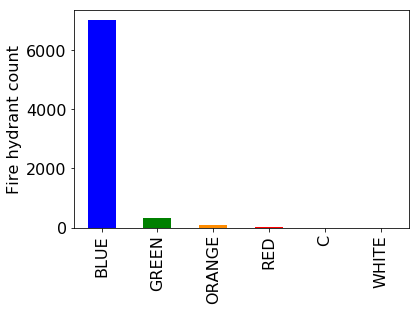

In [18]:
clean_df = df["nozzle_color"].str.upper()# How to handle clean up of the data?
ax = clean_df.value_counts().plot.bar(color=["b", "g", "darkorange", "r", "c", "0.5"])
ax.set_ylabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

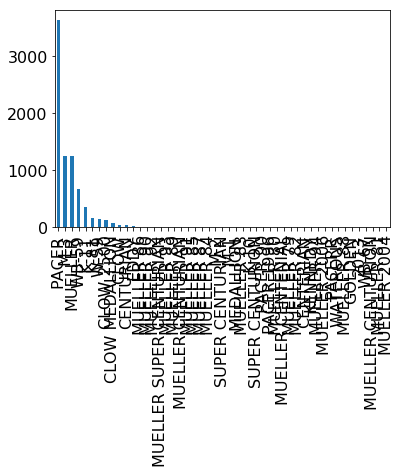

In [19]:
style_counts = df["Style"].str.upper().value_counts()
style_counts.plot.bar()

Text(0.5, 0, 'Hydrant count')

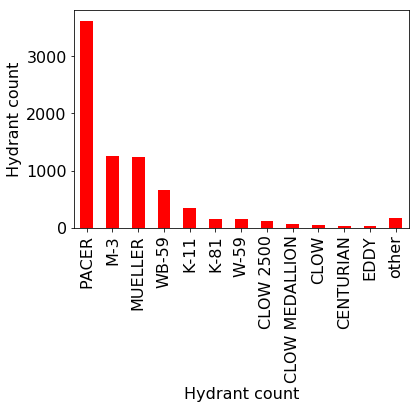

In [20]:
top12 = style_counts.iloc[:12]
top12["other"] = style_counts.iloc[12:].sum()
ax = top12.plot.bar(color="r")
ax.set_ylabel("Hydrant count")
ax.set_xlabel("Hydrant count")

### In what *decade* were *pacers manufactured*?
### Take a peek at the *Style* column data

In [21]:
print(df["Style"].head())
print(df["Style"].tail())

0    Pacer
1    Pacer
2    Pacer
3    Pacer
4    Pacer
Name: Style, dtype: object
10104    NaN
10105    NaN
10106    NaN
10107    NaN
10108    NaN
Name: Style, dtype: object


### Which *column* gives *year* information?

In [22]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### How to get the *decade* for *pacers* and *others*?

In [23]:
df[["Style", "year_manufactured"]].head()

,Style,year_manufactured
0,Pacer,1996.0
1,Pacer,1995.0
2,Pacer,1996.0
3,Pacer,1995.0
4,Pacer,1996.0


In [24]:
pacer_years = df["year_manufactured"][df["Style"] == "Pacer"]
other_years = df["year_manufactured"][df["Style"] != "Pacer"]
print(pacer_years.head())
print(other_years.head())

0    1996.0
1    1995.0
2    1996.0
3    1995.0
4    1996.0
Name: year_manufactured, dtype: float64
18    1987.0
22    1996.0
23    1996.0
71    1987.0
72    1987.0
Name: year_manufactured, dtype: float64


In [25]:
pacer_decades = (pacer_years // 10 * 10)
pacer_decades.head()

0    1990.0
1    1990.0
2    1990.0
3    1990.0
4    1990.0
Name: year_manufactured, dtype: float64

### How to *count the decades* for pacers and others?

In [26]:
pacer_decades = (pacer_years // 10 * 10).value_counts()
pacer_decades.head()

2000.0    1730
1990.0     846
2010.0     503
1980.0      21
1960.0       1
Name: year_manufactured, dtype: int64

### How to convert the *decades* back to *int*?

In [27]:
#Doesn't work because of NaN values
#pacer_decades = (pacer_years // 10 * 10).astype(int).value_counts()
#pacer_decades.head()

In [28]:
#Getting rid of NaN values
pacer_decades = (pacer_years // 10 * 10).dropna()
pacer_decades = pacer_decades.astype(int).value_counts()
pacer_decades

2000    1730
1990     846
2010     503
1980      21
1960       1
Name: year_manufactured, dtype: int64

In [29]:
other_decades = (other_years // 10 * 10).dropna()
other_decades = other_decades.astype(int).value_counts()
other_decades

2010    1196
1980     937
1970     578
1990     431
1950     371
1960     349
2000     215
1940      68
1930       9
1900       1
Name: year_manufactured, dtype: int64

### How to put both the pacers and other decade counts Series together?

In [30]:
plot_df = DataFrame({
    "pacer": pacer_decades,
    "other": other_decades,
})
plot_df

,pacer,other
1900,NaN,1
1930,NaN,9
1940,NaN,68
1950,NaN,371
1960,1.0,349
1970,NaN,578
1980,21.0,937
1990,846.0,431
2000,1730.0,215
2010,503.0,1196


### Create a *bar plot* for visualization

Text(0, 0.5, 'Hydrant Count')

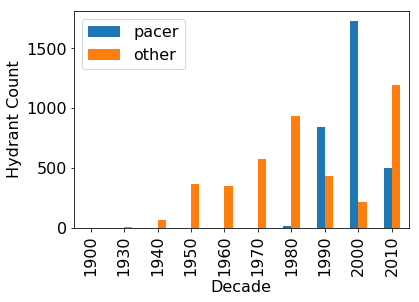

In [31]:
ax = plot_df.plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

Text(0, 0.5, 'Hydrant Count')

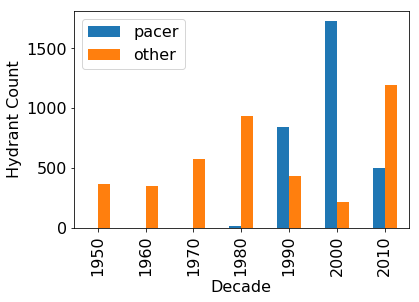

In [32]:
ax = plot_df[plot_df.index >= 1950].plot.bar()
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")

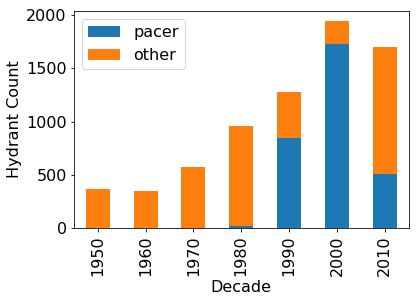

In [33]:
ax = plot_df[plot_df.index >= 1950].plot.bar(stacked=True)
ax.set_xlabel("Decade")
ax.set_ylabel("Hydrant Count")
None